## Visualize the Deep Fashion Dataset

In [89]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from PIL import Image
from utils.utils import add_keypoints
from utils.keypoints import extract_keypoints_from_heatmap
import torch
from Deepfashion_Dataset import Deepfashion_Dataset
from utils.utils import MEAN, STD

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Dataset And Display Images

2025-03-08 16:01:42.379 | INFO     | Deepfashion_Dataset:__init__:30 - Created Deep Fashion Dataset with 42031 upper_body images.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.003921580076217679..57.57600000000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.011764707922935491..57.57600000000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [2.7418136649970393e-09..57.57600000000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.003921580076217679..57.57600000000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [2.7418136649970393e-09..57.57600000000001].
Clipping input data to the valid range for imshow w

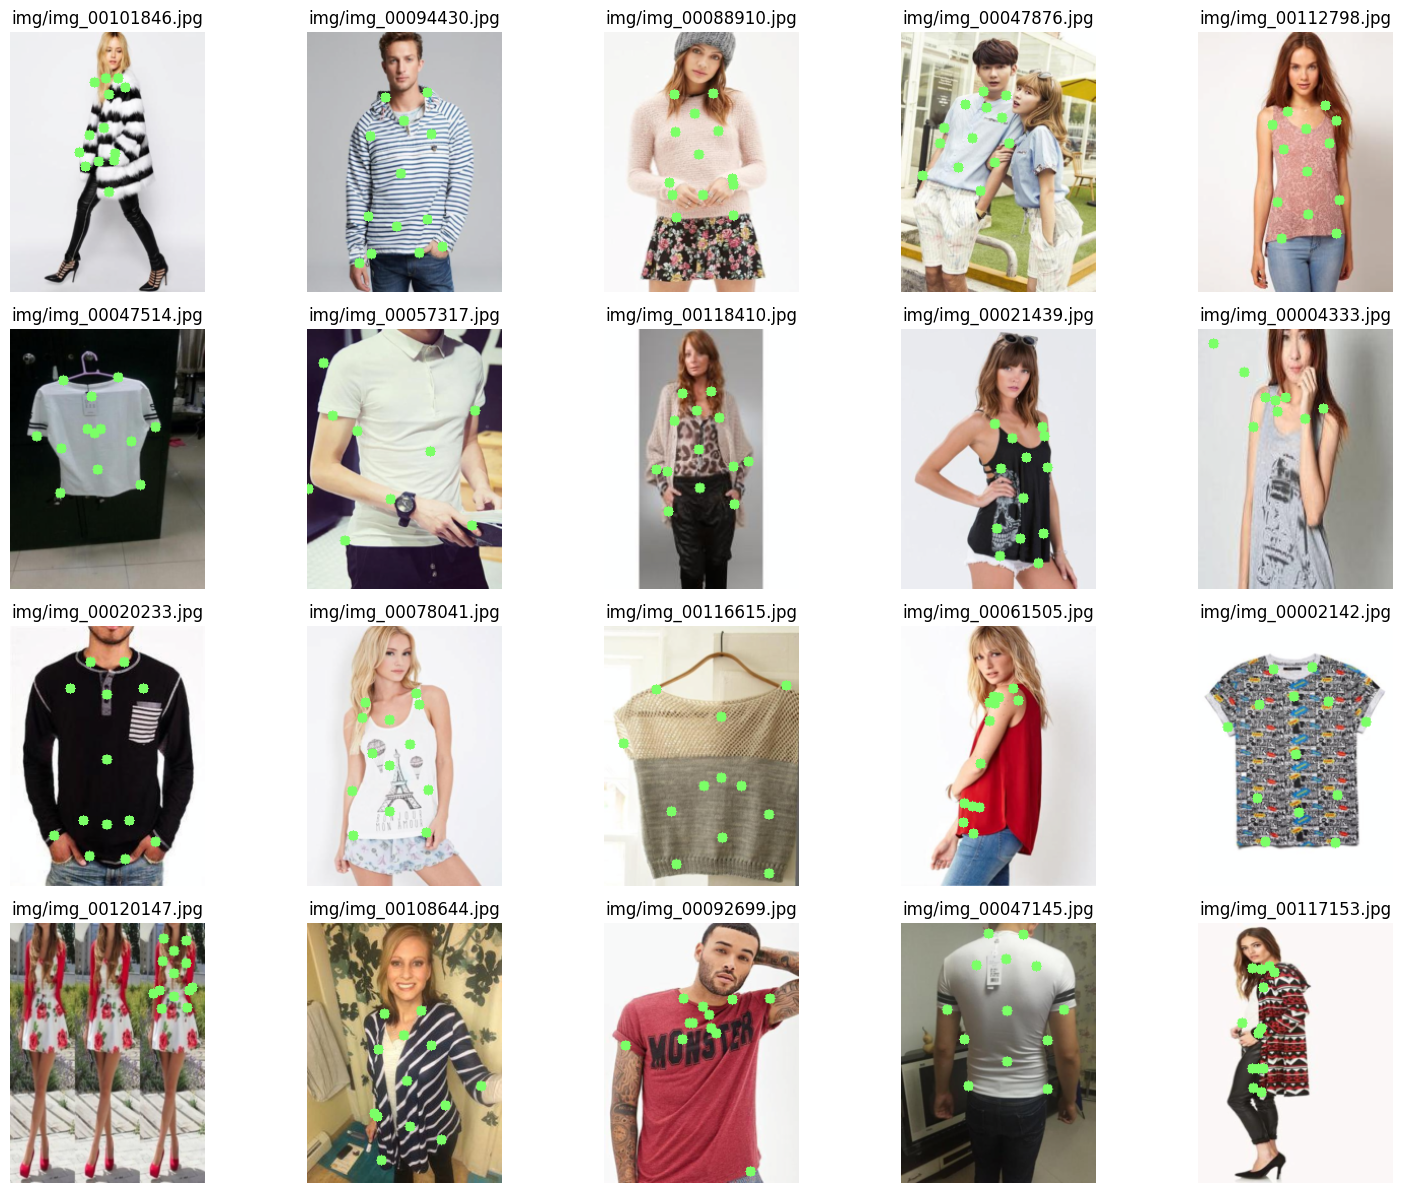

In [92]:
dataset_path = "../deepfashion"
num_images = 20

dataset = Deepfashion_Dataset(dataset_path, clothing_type='upper_body', augment=True)

rand_ind = np.random.randint(0, len(dataset), num_images)

# Set up the grid dimensions
grid_size = int(np.ceil(np.sqrt(num_images)))
fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Load and display image
for i, ind in enumerate(rand_ind):
    img_name, img, kpts, scoremaps = dataset[ind]
    img = add_keypoints(img, kpts)
    # Display image
    axes[i].imshow(img*STD + MEAN)
    axes[i].set_title(f"{img_name}")
    axes[i].axis('off')  # Hide axis

# Hide empty subplots
for i in range(num_images, len(axes)):
    axes[i].axis('off')
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


## Visualize Scoremaps

torch.Size([13, 64, 48])


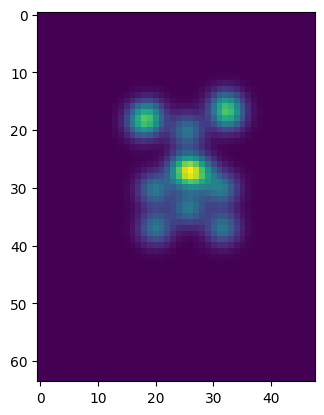

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0182073..2.64].


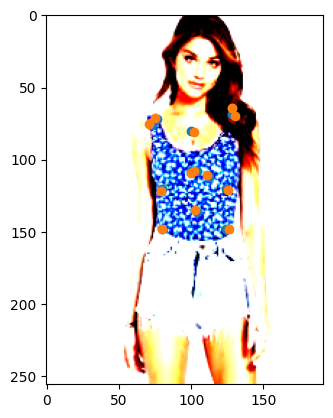

In [ ]:
ind = 222
name, img, kpts, scoremaps = dataset[ind]
extracted_kpts = extract_keypoints_from_heatmap(scoremaps)
extracted_kpts = np.array([[kp[0], kp[1]] for kp in extracted_kpts])*4

fig = plt.figure()
plt.imshow(torch.sum(scoremaps, dim=0))
plt.show()

fig = plt.figure()
plt.imshow(img.permute(1,2,0))
plt.scatter(x=extracted_kpts[:,0], y=extracted_kpts[:,1])
plt.scatter(x=kpts[:,0], y=kpts[:,1])
plt.show()

In [37]:
print(dataset[0][3].shape)

torch.Size([8, 64, 48])
